# **1. Logistic Regression Overview**
Logistic Regression là một mô hình phân loại nhị phân, được sử dụng để dự đoán xác suất của một trong hai lớp dựa trên các đặc trưng đầu vào. Đầu ra của LR là một xác suất, được giới hạn trong khoảng từ 0 đến 1, thông qua hàm sigmoid.

**Hàm Sigmoid:**
$$ 𝜎(𝑧) = \frac{1}{1 + e^{-z}} $$



Trong đó:


*   $$ z = w^Tx + b $$
*   𝑤 là vector trọng số
*   𝑥 là vector đặc trưng đầu vào
*   𝑏 là bias


**Xác suất dự đoán:**
$$𝑃(𝑦=1∣𝑥) = 𝜎(𝑤^𝑇𝑥+𝑏)$$

$$ 𝑃(𝑦=0∣𝑥)=1−𝜎(𝑤^𝑇𝑥+𝑏)$$


# **2. Cross-Entropy Loss**

Cross-entropy loss được sử dụng để đo lường độ khác biệt giữa giá trị dự đoán của mô hình và giá trị thực tế. Đối với bài toán phân loại nhị phân, hàm loss có dạng:

$$ 𝐿
(
𝑦
,
𝑦'
)
=
−
[
𝑦
log
⁡
(
𝑦'
)
+
(
1
−
𝑦
)
log
⁡
(
1
−
𝑦'
)
]
$$


Trong đó:


*   𝑦 là nhãn thực tế (0 hoặc 1)
*   $$𝑦'=𝜎(𝑤^𝑇𝑥+𝑏)$$​ là xác suất dự đoán

# **3. Thuật Toán Học cho Mô Hình Logistic Regression**
Để huấn luyện mô hình Logistic Regression, chúng ta thường sử dụng Gradient Descent để tối ưu hóa hàm loss. Các bước của thuật toán học bao gồm:

**Bước 1: Khởi tạo các tham số**

*   Khởi tạo các trọng số 𝑤 và bias 𝑏
(thường bằng 0 hoặc giá trị ngẫu nhiên nhỏ)

**Bước 2: Tính toán dự đoán**

*   Tính toán xác suất dự đoán cho mỗi mẫu:
$$
𝑦'
(
𝑖
)
=
𝜎
(
𝑤
^
𝑇
𝑥^{(i)}+𝑏) $$

**Bước 3: Tính toán hàm loss**

*   Tính toán giá trị của hàm loss cross-entropy cho toàn bộ tập dữ liệu:
$$
𝐿
=
−
\frac
{1}
{𝑚}
\sum_
{𝑖
=
1}
{𝑚}
[
𝑦^
{(
𝑖
)}
log
⁡
(
𝑦'
^
{(
𝑖
)}
)
+
(
1
−
𝑦^
{(
𝑖
)}
)
log
⁡
(
1
−
𝑦'
^
{(
𝑖
)}
)
]
$$

**Bước 4: Tính toán Gradient**


*  Tính gradient của hàm loss đối với các trọng số và bias:
$$
\frac
{∂𝐿}
{∂𝑤}
=
\frac
{1}
{𝑚}
\sum_
{𝑖
=
1}
{𝑚}
(
𝑦'
^
{(
𝑖
)}
−
𝑦^
{(
𝑖
)}
)
𝑥^
{(
𝑖
)}
$$

$$
\frac
{∂𝐿}
{∂𝑏}
=
\frac
{1}
{𝑚}
\sum_
{𝑖
=
1}
{𝑚}
(
𝑦'
^
{(
𝑖
)}
−
𝑦^
{(
𝑖
)}
)
$$


**Bước 5: Cập nhật các tham số**

* Cập nhật các trọng số và bias bằng cách sử dụng Gradient Descent với learning rate 𝛼:
$$
𝑤
=
𝑤
−
𝛼
\frac
{∂𝐿}
{∂𝑤}
$$


$$
𝑏
=
𝑏
−
𝛼
\frac
{∂𝐿}
{∂𝑏}
$$

**Bước 6: Lặp lại**

* Lặp lại các bước từ 2 đến 5 cho đến khi hàm loss hội tụ (đạt giá trị tối thiểu) hoặc đạt số vòng lặp tối đa.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm tính toán loss cross-entropy
def compute_loss(y, y_hat):
    m = y.shape[0]
    loss = -1/m * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

In [3]:
# Hàm huấn luyện Logistic Regression với cross-entropy loss
def train_logistic_regression(X, y, learning_rate=0.01, num_epochs=100):
    m, n = X.shape
    # Khởi tạo trọng số và bias
    w = np.zeros(n)
    b = 0

    # Lưu lịch sử loss để quan sát quá trình huấn luyện
    loss_history = []

    for epoch in range(num_epochs):
        # Tính toán dự đoán
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        # Tính toán loss
        loss = compute_loss(y, y_hat)
        loss_history.append(loss)

        # Tính toán gradient
        dw = 1/m * np.dot(X.T, (y_hat - y))
        db = 1/m * np.sum(y_hat - y)

        # Cập nhật trọng số và bias
        w -= learning_rate * dw
        b -= learning_rate * db

        # In thông tin huấn luyện mỗi 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return w, b, loss_history

In [4]:
# Hàm dự đoán
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_hat]

Epoch 0, Loss: 0.6931471805599453
Epoch 10, Loss: 0.6381661300621438
Epoch 20, Loss: 0.5902656030736786
Epoch 30, Loss: 0.5484236349374291
Epoch 40, Loss: 0.5117420742081128
Epoch 50, Loss: 0.47944795680557006
Epoch 60, Loss: 0.4508852157904086
Epoch 70, Loss: 0.42550176528895634
Epoch 80, Loss: 0.40283519833568926
Epoch 90, Loss: 0.38249893835001886
Training Accuracy: 100.00%


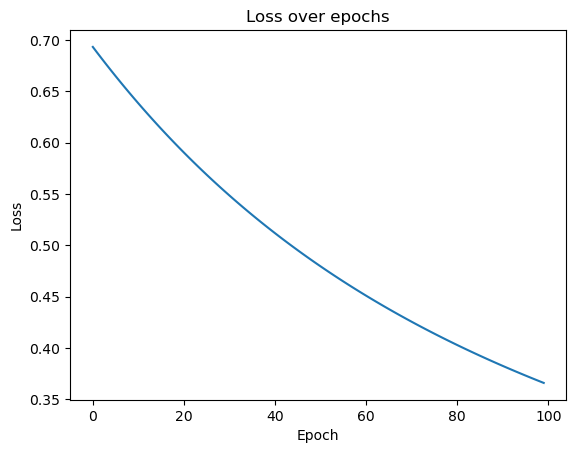

In [5]:
if __name__ == "__main__":
    # Tải dữ liệu Iris
    iris = load_iris()
    X = iris.data
    y = (iris.target == 0).astype(int)  # Chỉ phân loại giữa Iris-setosa (0) và các loài khác (1)

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Huấn luyện mô hình
    learning_rate = 0.01
    num_epochs = 100
    w, b, loss_history = train_logistic_regression(X_train, y_train, learning_rate, num_epochs)

    # Dự đoán trên tập kiểm tra
    y_pred = predict(X_test, w, b)

    # Đánh giá mô hình
    accuracy = np.mean(y_test == y_pred)
    print(f'Training Accuracy: {accuracy * 100:.2f}%')

    # Vẽ đồ thị loss theo epoch
    plt.plot(range(num_epochs), loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.show()


## Softmax regression

In [18]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Load dữ liệu từ MNIST dataset, bao gồm 60.000 training set và 10.000 test set. Sau đó chia bộ traning set thành 2: 50.000 cho training set và 10.000 dữ liệu cho validation set.

In [12]:

# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)



(50000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N * 28 * 28 * 1 để giống kích thước mà keras yêu cầu.

In [13]:

# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [19]:
# 4. One hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Bước này định nghĩa model:

1. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2. Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
3. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
3. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
4. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
5. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))

In [20]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

c:\Users\Snape\anaconda3\envs\torch\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:

# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
     

In [22]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)
     

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8065 - loss: 0.6681 - val_accuracy: 0.9832 - val_loss: 0.0669
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9832 - loss: 0.0606 - val_accuracy: 0.9863 - val_loss: 0.0458
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.9898 - loss: 0.0366 - val_accuracy: 0.9875 - val_loss: 0.0446
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9942 - loss: 0.0209 - val_accuracy: 0.9873 - val_loss: 0.0414
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9958 - loss: 0.0155 - val_accuracy: 0.9890 - val_loss: 0.0394
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9979 - loss: 0.0092 - val_accuracy: 0.9885 - val_loss: 0.0415
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9986 - loss: 0.0067 - val_accuracy: 0.9886 - val_loss: 0.0394
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9991 - loss

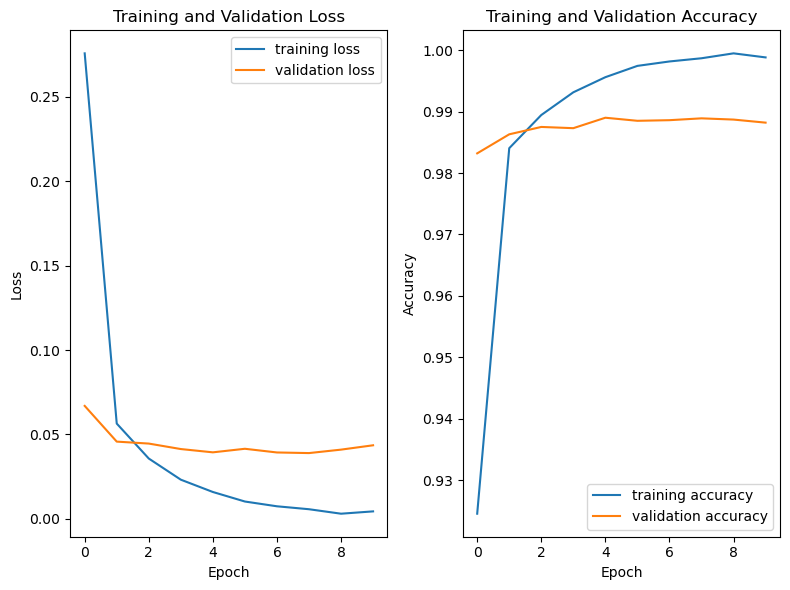

In [30]:
# 6. Vẽ đồ thị loss
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
numOfEpoch = 10
# Loss plot
ax[0].plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
ax[0].plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Accuracy plot
ax[1].plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='training accuracy')
ax[1].plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

In [31]:

# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03505364805459976, 0.9896000027656555]


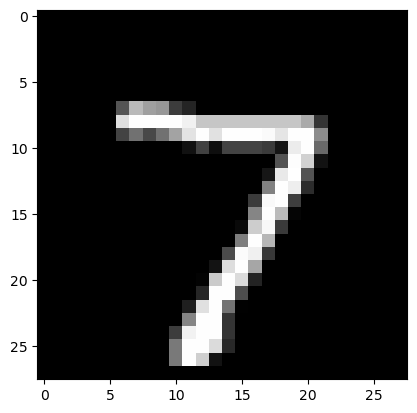

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Giá trị dự đoán (xác suất của 10 nodes): [6.6395400e-10 8.0032486e-08 2.5570305e-08 2.2368147e-06 1.7654418e-09
 1.0862004e-08 1.0702015e-11 9.9999654e-01 1.6149391e-09 1.0941684e-06]
Lớp 0: 6.639540028885449e-10
Lớp 1: 8.003248552768127e-08
Lớp 2: 2.5570304984512404e-08
Lớp 3: 2.2368146801454714e-06
Lớp 4: 1.7654417927559507e-09
Lớp 5: 1.0862003740896853e-08
Lớp 6: 1.070201479519417e-11
Lớp 7: 0.999996542930603
Lớp 8: 1.6149390713593448e-09
Lớp 9: 1.0941683967757854e-06


In [35]:
# 10. Dự đoán ảnh và in ra giá trị của 10 nodes
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.show()

y_predict = model.predict(X_test[0].reshape(1,28,28,1))[0]
print('Giá trị dự đoán (xác suất của 10 nodes):', y_predict)

# In ra giá trị của 10 nodes (lớp)
for i, prob in enumerate(y_predict):
    print(f'Lớp {i}: {prob}')

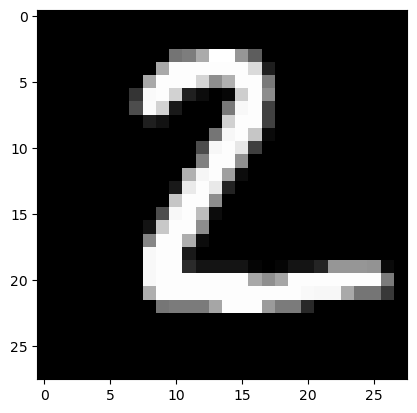

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Giá trị dự đoán (xác suất của 10 nodes): [3.5122298e-08 8.3164446e-07 9.9999905e-01 1.1412332e-08 1.7690462e-09
 1.2044758e-10 4.5533806e-08 3.0173757e-09 3.2102477e-08 9.3401586e-10]
Lớp 0: 3.5122297958878335e-08
Lớp 1: 8.316444564115955e-07
Lớp 2: 0.9999990463256836
Lớp 3: 1.1412332412419346e-08
Lớp 4: 1.7690462428276987e-09
Lớp 5: 1.2044758246343434e-10
Lớp 6: 4.553380605898383e-08
Lớp 7: 3.0173756826457065e-09
Lớp 8: 3.2102477121043194e-08
Lớp 9: 9.340158646509167e-10


In [37]:
# Lấy một ảnh khác từ tập dữ liệu kiểm tra
plt.imshow(X_test[1].reshape(28,28), cmap='gray')
plt.show()

# Dự đoán và in ra giá trị của 10 nodes
y_predict1 = model.predict(X_test[1].reshape(1,28,28,1))[0]
print('Giá trị dự đoán (xác suất của 10 nodes):', y_predict1)

# In ra giá trị của 10 nodes (lớp)
for i, prob in enumerate(y_predict1):
    print(f'Lớp {i}: {prob}')
